In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Construct a model using Perceptron on Soap-Sud Dataset. Do prediction using interpolation and extrapolation and calculate the measures like R^2 and MSE. Also, build a Simple Linear Regression model and compare the models using Perceptron and Simple Linear Regression using R^2 and MSE.

In [2]:
# Dataset
# x1 = Soap | y = Sud
df = pd.DataFrame({"x0":np.ones(7), "x1": np.linspace(4.0, 7.0, 7), "y": np.array([33, 42, 45, 51, 53, 61, 62])})
df

,x0,x1,y
0,1.0,4.0,33
1,1.0,4.5,42
2,1.0,5.0,45
3,1.0,5.5,51
4,1.0,6.0,53
5,1.0,6.5,61
6,1.0,7.0,62


In [3]:
X = df.drop(columns=["y"])
y = df["y"]
X, y

(    x0   x1
 0  1.0  4.0
 1  1.0  4.5
 2  1.0  5.0
 3  1.0  5.5
 4  1.0  6.0
 5  1.0  6.5
 6  1.0  7.0,
 0    33
 1    42
 2    45
 3    51
 4    53
 5    61
 6    62
 Name: y, dtype: int64)

In [4]:
def PERCEPTRONNFORREGRESSION(X, y, W, η):
    # convergence thru diff threshold
    # while not converged
    epochs = 1
    history = [W.copy()]
    while True:
        # init iteration_gradient
        iteration_gradient = np.array([0.0, 0.0])
        # for each point in the dataset (x0, x1)
        for iteration in range(X.shape[0]):
            # find yHat = W.T.X
            yHat = np.dot(W.T, np.array(X.iloc[iteration]))
            # find grad = d/dW (Error fn)
            grad = (y.iloc[iteration] - yHat) * np.array(X.iloc[iteration])
            # update iteration_gradient
            iteration_gradient += grad
        # check for convergence
        wNew = W + η * iteration_gradient
        history.append(wNew.copy())
        if np.allclose(wNew, W):
            break
        # update W with the iteration_gradient
        W = wNew
        epochs += 1
    return W, epochs, history

In [5]:
def plot_line_progression(W_history, X):
    # Assuming W_history is a list of weight vectors over epochs
    _, ax = plt.subplots(figsize=(8, 8))
    
    # Plot each line corresponding to W in W_history
    for W in W_history:
        if np.abs(W[1]) > 1e-8:  # Avoid division by zero if w1 is close to zero
            x0_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
            x1_vals = -W[0] / W[1] * x0_vals
            ax.plot(x0_vals, x1_vals, label=f'Line: {W[0]:.2f}x0 + {W[1]:.2f}x1 = 0')
    
    # Scatter plot of the data points (assuming X is a 2D array)
    ax.scatter(X[:, 0], X[:, 1], color='red', label='Data Points')
    
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('Progression of Line Equation wTx = 0')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [8]:
W = np.array([0, 0])
W, epochs, w_history = PERCEPTRONNFORREGRESSION(X, y, W, 0.0001)
print(f"{W} in {epochs} epochs.")

[-1.83399891  9.35120746] in 74060 epochs.


Perceptron - SSE: 20.12407030457657, MSE: 2.8748671863680815, R-squared: 0.9691213300894266


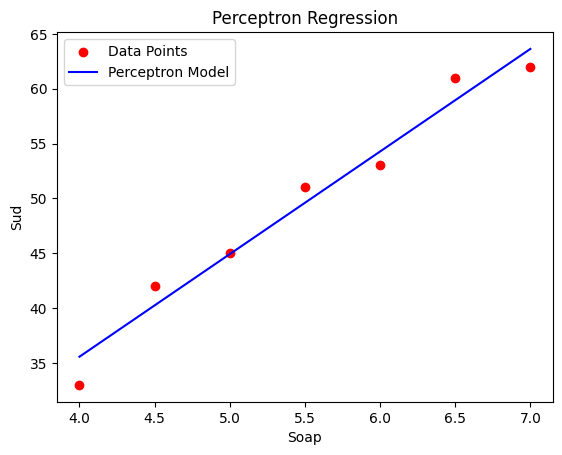

In [11]:
# Predictions using Perceptron
X_vals = np.linspace(min(X["x1"]), max(X["x1"]), 100)
X_pred = np.column_stack((np.ones_like(X_vals), X_vals))
y_pred = np.dot(X_pred, W)

# Calculate metrics for Perceptron
sse_perceptron = np.sum((y - np.dot(X, W)) ** 2)
mse_perceptron = mean_squared_error(y, np.dot(X, W))
r2_perceptron = r2_score(y, np.dot(X, W))

print(f"Perceptron - SSE: {sse_perceptron}, MSE: {mse_perceptron}, R-squared: {r2_perceptron}")


# Plot Perceptron model
plt.scatter(X["x1"], y, color='red', label='Data Points')
plt.plot(X_vals, y_pred, label='Perceptron Model', color='blue')
plt.xlabel('Soap')
plt.ylabel('Sud')
plt.title('Perceptron Regression')
plt.legend()
plt.show()

/home/jass/repos/college9/20XW96 - DEEP LEARNING LAB/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression - SSE: 19.964285714285698, MSE: 2.8520408163265283, R-squared: 0.9693665059184569


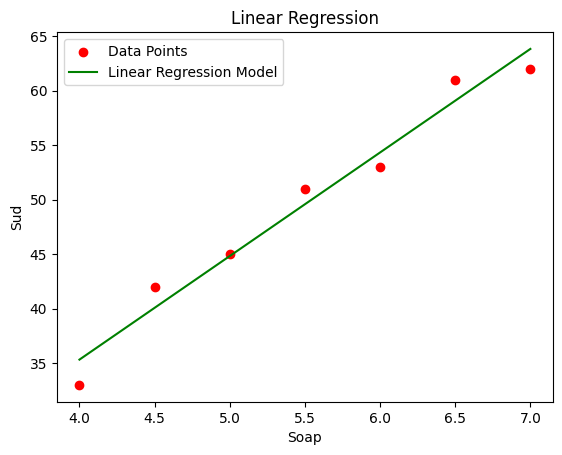

In [12]:
# Train Simple Linear Regression model
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# Predictions using Linear Regression
y_pred_lr_vals = lr.predict(np.column_stack((np.ones_like(X_vals), X_vals)))

# Calculate metrics for Simple Linear Regression
sse_lr = np.sum((y - y_pred_lr) ** 2)
mse_lr = mean_squared_error(y, y_pred_lr)
r2_lr = r2_score(y, y_pred_lr)

print(f"Linear Regression - SSE: {sse_lr}, MSE: {mse_lr}, R-squared: {r2_lr}")

# Plot Linear Regression model
plt.scatter(X["x1"], y, color='red', label='Data Points')
plt.plot(X_vals, y_pred_lr_vals, label='Linear Regression Model', color='green')
plt.xlabel('Soap')
plt.ylabel('Sud')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [13]:
# Compare the models
print(f"Perceptron - SSE: {sse_perceptron}, MSE: {mse_perceptron}, R-squared: {r2_perceptron}")
print(f"Linear Regression - SSE: {sse_lr}, MSE: {mse_lr}, R-squared: {r2_lr}")

Perceptron - SSE: 20.12407030457657, MSE: 2.8748671863680815, R-squared: 0.9691213300894266
Linear Regression - SSE: 19.964285714285698, MSE: 2.8520408163265283, R-squared: 0.9693665059184569
